# Exercise 7: Active ion channels and a small network

The dynamical properties of a neuron is primarilly determined by the kinds of ion channels that it possesses, and how much it possesses of each kind. Even if two different neurons have the same set of ion channels, they may have quite different dynamical properties because some ion channels may be more abundant in one cell than in the other. In this exercise, you will work with a single compartment model with six different ion channels:

* $I_{Na}$: Hodgik-Huxley-like sodium channel for action potential upstroke (conductance parameter $gna$).
* $I_{Kdr}$: Hodgik-Huxley-like potassium channel for action potential downstroke (conductance parameter $gkdr$).
* $I_{T}$: Low-voltage-activated calcium channel (conductance parameter $gcat$).
* $I_{L}$: High-voltage-activated calcium channel (conductance parameter $gcal$).
* $I_{AHP}$: Calcium-activated potassium channel causing afterhyperolarization (conductance parameter $gahp$).
* $I_{h}$: Hyperpolarization activated general cation channel (conductance parameter $ghbar$).

The ion channels were taken from a model of a thalamic interneuron, and if you are interested, you can read more about them there (Halnes et al. 2011: PLoS Comput Biol 7(9): e1002160. https://doi.org/10.1371/journal.pcbi.1002160). Some of the responses that this set of ion channels can generate are shown in Figure 1. One of the ion channels, $I_{AHP}$, is not activated by voltage, but by calcium that enters through the two calcium channels $I_{L}$ and $I_{T}$. The model thus also keeps track of the intracellular calcium concentration. As concentration changes are typically slower than voltage changes, this gives the neuron a quite rich repetoire of firing properties and allows for both faster (action potentials) and slower (calcium dependent) oscillations in the membrane potential.

<img src="Firingpatterns.png" width = "600">
__Figure 1:__ Firing patterns in various neurons responding to step current injection (+ 20 pA in __A__-__F__, and -20 pA in __G__-__H__). __A:__ Initial burst followed by regular AP firing. __B:__ Periodic bursting. __C:__ Initial AP followed by oscillations (called calcium oscillations, since they depend on calcium channels). __D:__ Regular AP firing. __E:__ Regular AP-firing with strong, sharp afterhyperpolarization. __F:__ Regular AP-firing with strong, smoother afterhyperpolarization. __G:__ Hyperpolarizing input produces an initial sag in the membrane potential. __H:__ When released from hyperpolarization, the neuron fires a so-called rebound burst.

## Exercise 7.1: Firing properties of the single compartment model
In the code below (based on Neuron and Python), you are given a template for the single compartment neuron with a set of ion channels, with parameters (maximum conductances) set so that the neuron fires as in Fig. 2 (similar voltage dynamics as in Figure 1A). Your task is to vary the conductances of the different ion channels in order to explore which of them that give rise to the different aspects of the neuron´s response. Try to reproduce all the different firing patterns in Figure 1 (for the same stimulus injections, $\pm$ 20 pA).

<img src="Default.png" width = "600">
__Figure 2:__ Voltage and calcium dynamics in the default version of the model.

__a)__ As a starting point, turn off the stimulus. What is the resting potential of the neuron? Does any of the active conductances affect the resting potential? What does that mean?

__b)__ In Fig. 1A the neurons responds to the input current by an initial burst followed by regular AP firing. Which ion channel causes the initial burst?

__c)__ Which ion channel(s) do you need to modify to make the neuron burt periodically (Fig. 1B)? Try to describe the mechanisms that underlie periodic bursting.

__d)__ In Fig. 1C the neuron elicits an initial AP, followed by voltage fluctuations that are not action potentials. What ion channel(s) produce this oscillation?

__e)__ Can you make the neuron fire regular as in Fig. 1D? Which ion channels can you vary to alter the firing rate of the neuron without affecting the qualitative behavior too much (e.g. without introducing bursting)?

__f)__ In Fig. 1E and Fig. 1F, APs are followed by a quite strong afterhyperpolarization (negative voltage peak). In Fig. 1E the afterhyperpolarization is sharp, while in Fig. 1F it is smoother. Can you determine which ion channels that produce such sharp versus smooth afterhyperpolarizations?

__g)__ The neuron in Fig. 1G is exposed to a hyperpolarizing current injection (- 20 pA). The response is an inital deep sag in the membrane potential, before the neuron (still during stimulus) settles on a somewhat less hyperpolarized voltage level. What ion channel causes this initial sag (or rather, the picks it up from it)?

__h)__ When the neuron in Fig. 1G and 1F are released from the hyperpolarizing input, the membrane potential also makes a little overshoot before it settles on the resting potential. Which ion channel causes this overshoot?

__i)__ When the neuron in Fig. 1F is released from hyperpolarization, the overshoot is large enough to evoke a burst of action potentials, known as a rebound burst. In addition to $I_{Na}$ and $I_{Kdr}$ for AP-generation, two ion channels are needed to produce such rebound bursts. Which two?

In [3]:
%matplotlib inline
!nrnivmodl
from neuron import h, load_mechanisms
from numpy import trapz
import matplotlib.cm as cm
import matplotlib.pyplot as plt

/mnt/user/shared/FYS388_test2/comp_neuro_course/Exercises/Exercise07
Mod files: "./Cad.mod" "./HH_traub.mod" "./Ican.mod" "./iahp.mod" "./iar.mod" "./ical.mod" "./it2.mod"

 -> Compiling mod_func.cpp
 => LINKING shared library ./libnrnmech.so
 => LINKING executable ./special LDFLAGS are:    -pthread /srv/main-spack-instance-2402/spack/opt/spack/linux-ubuntu20.04-x86_64/gcc-10.3.0/readline-8.2-fyomclrl5v4af2xdqr3lvubsauokgjtj/lib/libreadline.so -Wl,-rpath,/srv/main-spack-instance-2402/spack/opt/spack/linux-ubuntu20.04-x86_64/gcc-10.3.0/readline-8.2-fyomclrl5v4af2xdqr3lvubsauokgjtj/lib /srv/main-spack-instance-2402/spack/opt/spack/linux-ubuntu20.04-x86_64/gcc-10.3.0/ncurses-6.4-kmcqrtvkqajlqndesa26t7e7qz7jy3iw/lib/libcurses.so -Wl,-rpath,/srv/main-spack-instance-2402/spack/opt/spack/linux-ubuntu20.04-x86_64/gcc-10.3.0/ncurses-6.4-kmcqrtvkqajlqndesa26t7e7qz7jy3iw/lib /srv/main-spack-instance-2402/spack/opt/spack/linux-ubuntu20.04-x86_64/gcc-10.3.0/ncurses-6.4-kmcqrtvkqajlqndesa26t7e7qz7jy

In [4]:
class Mymodel(object): # Template for defining a cell model
    # Creates neuron model
    def __init__(self,gna,gkdr,gahp,gcat,gcal,ghbar):
        self.create_cell()
        self.define_geometry()
        self.define_biophysics(gna,gkdr,gahp,gcat,gcal,ghbar)
        h.celsius = 36
    def create_cell(self):
        self.soma = h.Section(name='soma', cell=self)
    def define_geometry(self):
        self.soma.L = self.soma.diam = 20     # microns
        h.define_shape() # Translate into 3D points.
    def define_biophysics(self,
                 gna = 0.01, 
                 gkdr = 0.01, 
                 gahp = 5e-5, 
                 gcat = 2e-4, 
                 gcal = 0.0009, 
                 hhbar = 0.00005):
        # Passive properties
        rall = 200 # axial resistance
        cap = 1.1 # membrane capacitance
        Rm = 45000.0 # membrane resistance
        Epas = -80 
        nash = - 52.6
        kdrsh = -51.2
        catau = 50
        
        self.soma.insert('pas')
        self.soma.e_pas = Epas
        self.soma.g_pas = 1/Rm
        self.soma.cm = cap
        self.soma.insert("iar")
        self.soma.insert("hh2")
        self.soma.insert("Cad")
        self.soma.insert("it2")
        self.soma.insert("ical")
        self.soma.insert("iahp")
        self.soma.ena = 50 # Reversal potential for sodium
        self.soma.ek = -90 # Reversal potential for potassium 
        self.soma.gnabar_hh2 = gna
        self.soma.gkbar_hh2 = gkdr
        self.soma.gcabar_it2 = gcat
        self.soma.vtraubNa_hh2 = nash 
        self.soma.vtraubK_hh2 = kdrsh
        self.soma.pcabar_ical = gcal
        self.soma.gkbar_iahp = gahp
        self.soma.ghbar_iar = ghbar

In [5]:
# Functions that controls what to record and how to plot (t and Vm and Ca++)
def set_recording_vectors(cell):
    soma_v_vec = h.Vector()   # Membrane potential vector at soma
    soma_ca_vec = h.Vector()   # Membrane potential vector at soma
    t_vec = h.Vector()        # Time stamp vector
    soma_v_vec.record(cell.soma(0.5)._ref_v)
    soma_ca_vec.record(cell.soma(0.5)._ref_Cai)
    t_vec.record(h._ref_t)
    return soma_v_vec, soma_ca_vec, t_vec

# Function that runs simulation
def simulate(tstop=2000):
    h.tstop = tstop
    h.run()

# Function that plots output
def show_output(soma_v_vec,soma_ca_vec, t_vec, new_fig=True):
    if new_fig:
        plt.figure(figsize=(10,4)) # Default figsize is (8,6)
    vax = plt.subplot(121)
    plt.title('Voltage')
    plt.xlabel('time (ms)')
    plt.ylabel('mV')
    cax = plt.subplot(122)
    plt.xlabel('time (ms)')
    plt.ylabel('mM')
    plt.title('Calcium')
    vax.plot(t_vec, soma_v_vec, color='black')
    cax.plot(t_vec, soma_ca_vec, color='black')
    plt.subplots_adjust(wspace = 0.3) 

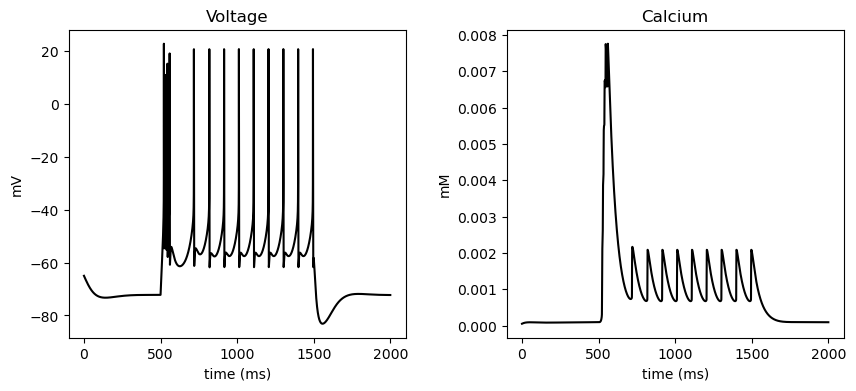

In [7]:
# Channel densities
gna =  0.01 # S/cm2
gkdr = 0.01
gahp = 5e-5
gcat= 2e-4
gcal=0.0009
ghbar=0.00005

# Create model with the above parameters
cell = Mymodel(gna,gkdr,gahp,gcat,gcal,ghbar)

h.load_file('stdrun.hoc')
stim = h.IClamp(cell.soma(0.5))
stim.delay = 500
stim.dur = 1000
stim.amp = 0.02

soma_v_vec, soma_ca_vec, t_vec = set_recording_vectors(cell)
simulate()
show_output(soma_v_vec, soma_ca_vec, t_vec)
plt.show()

## Exercise 7.2: A small ring-network of spiking neurons
The neuron model in Exercise 7.1 was build inside of a class, which allows you to make arbitrarily many copies of it by calling e.g., 

<code>
for i in range(N):
    nwcell = Mymodel(gna,gkdr,gahp,gcat,gcal,ghbar)
    cells.append(nwcell)
</code>

In Exercise 7.2 you will use the template to construct a small ring-network of $N=5$ neurons, as depicted in Fig. 2. This network is asimplified version of the ring-network presented in the neuron/python-tutorial on the neuron homepage, and you could follow this example rather closely to acchieve your task:

https://neuron.yale.edu/neuron/docs/ball-and-stick-model-part-1

https://neuron.yale.edu/neuron/docs/ball-and-stick-model-part-2


In your case, you will use single-compartment neurons (not ball-and-stick as on the home-page). For simplicity, you can omit the specification of spatial coorditates that are used in the online-tutorial, i.e., you can simply connect the neurons 1-2-3-4-5-1 without specifying any coordinates. The tasks are:

__a)__ Use the original parameterization of the model (same for all five neurons) and construct the ring network.

__b)__ Give an external synaptic input to one of the neurons (blue synapse in Fig. 2) and make it sufficiently strong to evoke firing the receiving neuron.

__c)__ Let $w$ be the weight of the network connections (red synapses in Fig. 2). Let all connections have the same $w$, and find the ranges of $w$ that are so that:
* __c1)__ A triggered spike in neuron 1 does not give spiking in any other cell in the network.
* __c2)__ triggered spike in neuron 1 starts a network activity that goes on forever.
* __c3)__ A triggered spike in neuron 1 propagates through the network, but the network activity eventually dies out.
    
__d)__ Can you give an explanation to why the latter case (c3) exists? How can it be that the network activity can propagate through the entire network but still die out? Why doesn't it go round and round forever in an infinite loop?

__e)__ If you feel up for it, change some of the conductances at the simple neuron level, and exlpore how this affects the ranges of $w$ that you found above.

<img src="Ringnetwork.png" width = "300">

__Figure 2:__ Sketch of a ring network where one neuron (1) is triggered by an external synaptic input.